The purpose of this notebook is to calculate the Stokes Parameters and demonstrate the polarization in terms of the components of linearly or circularly polarized unit vectors.

First, we import the necessary files:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import animation, rc
from IPython.display import HTML

# Theory: From Electric Field to Stokes Parameters
The electric field vector of a wave is given by: <br> <br>
$$ \mathbf{E} = (\mathbf{\hat{x}} E_1 + \mathbf{\hat{y}} E_2)e^{-i \omega t} = \mathbf{E_0} e^{-i \omega t} $$ <br>
The complex amplitudes $ {E_1} $ and $ {E_2} $ can be expressed by: <br> <br>
$$ E_1 = \mathcal{E_1} e^{i \phi_1} $$  $$ E_2 = \mathcal{E_2} e^{i \phi_2} $$ <br>
Taking the real parts, the x and y components are: <br> <br>
$$ E_x = \mathcal{E_1} \cos{(\omega t - \phi_1)} $$  $$ E_y = \mathcal{E_2} \cos{(\omega t - \phi_2)} $$ <br> 
For a general ellipse (with major/minor axes tilted at an angle $\chi$ with respect to the x and y axes), the components become: <br> <br>
$$ E_x = \mathcal{E_0} (\cos{\beta}\cos{\chi}\cos{\omega t} + \sin{\beta}\sin{\chi}\sin{\omega t}) $$  $$ E_y = \mathcal{E_0} (\cos{\beta}\sin{\chi}\cos{\omega t} - \sin{\beta}\cos{\chi}\sin{\omega t}) $$ <br>
In the equations for the different components, $ -\frac{\pi}{2} \leq \beta \leq \frac{\pi}{2} $ . <br> <br>
Comparing the two equations for $ E_x $ and $ E_y $ , we find: <br> <br>
$$ \mathcal{E_1}\cos{\phi_1} = \mathcal{E_0}\cos{\beta}\cos{\chi} $$  $$ \mathcal{E_1}\sin{\phi_1} = \mathcal{E_0}\sin{\beta}\sin{\chi} $$  $$ \mathcal{E_2}\cos{\phi_2} = \mathcal{E_0}\cos{\beta}\sin{\chi} $$  $$ \mathcal{E_2}\sin{\phi_2} = -\mathcal{E_0}\sin{\beta}\cos{\chi} $$ <br>
The Stokes Parameters for monochromatic waves are defined as: <br> <br>
$$ I \equiv \mathcal{E_1}^{2} + \mathcal{E_2}^{2} = \mathcal{E_0}^{2} $$  $$ Q \equiv \mathcal{E_1}^{2} - \mathcal{E_2}^{2} = \mathcal{E_0}^{2}\cos{2 \beta}\cos{2 \chi} $$  $$ U \equiv 2\mathcal{E_1}\mathcal{E_2}\cos{(\phi_1 - \phi_2)} = \mathcal{E_0}^{2}\cos{2 \beta}\sin{2 \chi} $$  $$ V \equiv 2\mathcal{E_1}\mathcal{E_2}\sin{(\phi_1 - \phi_2)} = \mathcal{E_0}^{2}\sin{2 \beta} $$ <br>
So, given $ \mathcal{E_0} $, the tilt angle ($ \chi $), and $ \beta $, it is possible to determine $ \mathcal{E_1} $, $ \phi_1 $, $ \mathcal{E_2} $, $ \phi_2 $ (which are necessary to determine the electric field vector $ \mathbf{E} $), and all of the Stokes Parameters ($ I $, $ Q $, $ U $, $ V $).

# Example:
We want to find the Stokes Parameters and see the polarization in terms of the linearly and circularly polarized unit vectors. First, we must define the necessary parameters: $ \mathcal{E_0} $ (the amplitude of the polarization vector), $ \chi $ (the tilt of the semi-major axis of the ellipse of polarization with respect to the x axis), and $ \beta $ (the relative phase of the two circular polarizations):

In [2]:
eps_0 = 1.0
chi = np.pi / 4.
beta = np.pi / 6.

Check the inputs.

In [3]:
assert(eps_0 > 0)
assert(chi >= 0 and chi <= np.pi)
assert(beta >= -np.pi / 2. and beta <= np.pi / 2.)

Define key variables and arrays.

In [4]:
x1 = eps_0 * np.cos(beta) * np.cos(chi) 
x2 = eps_0 * np.sin(beta) * np.sin(chi)
y1 = eps_0 * np.cos(beta) * np.sin(chi)
y2 = eps_0 * np.sin(beta) * np.cos(chi)
x = []
y = []
xcp = []
ycp = []
xcm = []
ycm = []

Compute the circular polarization amplitudes in terms of input quantities.

In [5]:
a_plus = eps_0 * (np.cos(beta) - np.sin(beta)) / np.sqrt(2.)
a_minus = eps_0 * (np.cos(beta) + np.sin(beta)) / np.sqrt(2.)

Define a routine to compute components from phases.

In [6]:
def calc_phase(phase):
    xt = x1 * np.cos(phase) + x2 * np.sin(phase)
    yt = y1 * np.cos(phase) - y2 * np.sin(phase)
    return xt, yt

Set movie parameters.

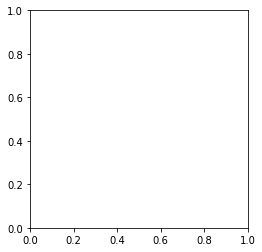

In [7]:
Nframes = 100
fig, ax = plt.subplots()
ax.set_aspect('equal')
number_cycles = 3

Define the routine to draw frames.

In [8]:
def updatefig(i):
    ax.clear()
    phase = number_cycles * 2. * np.pi * float(i) / float(Nframes - 1)
    xt, yt = calc_phase(phase)
    x.append(xt)
    y.append(yt)
    xp = a_plus * np.cos(phase + chi) / np.sqrt(2.)
    yp = a_plus * np.sin(phase + chi) / np.sqrt(2.)
    xm = a_minus * np.cos(phase - chi) / np.sqrt(2.)
    ym = -a_minus * np.sin(phase - chi) / np.sqrt(2.)
    xcp.append(xp)
    ycp.append(yp)
    xcm.append(xm)
    ycm.append(ym)
    ax.arrow(0, 0, xt, 0, head_width = 0.05, color = 'g', length_includes_head = True)
    ax.arrow(0, 0, 0, yt, head_width = 0.05, color = 'g', length_includes_head = True)
    ax.arrow(0, 0, xt, yt, head_width = 0.05, color = 'black', length_includes_head = True)
    ax.arrow(0, 0, xp, yp, head_width = 0.05, color = 'r', length_includes_head = True)
    ax.arrow(0, 0, xm, ym, head_width = 0.05, color = 'r', length_includes_head = True)
    ax.plot(x,y)
    ax.plot(xcp, ycp, ':', color = 'black')
    ax.plot(xcm, ycm, ':', color = 'black')
    ax.set_xlim(-1.1*eps_0, 1.1*eps_0)
    ax.set_ylim(-1.1*eps_0, 1.1*eps_0)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

Generate the movie.

In [9]:
anim = animation.FuncAnimation(fig, updatefig,  frames = Nframes)

View the movie.  The green arrows are the linear polarization vectors while the red arrows are the circular polarization vectors.  The black arrow is the total polarization vector, which is the vector sum of either the linear or circular polarization vectors.  Its tip traces out the blue ellipse.

In [10]:
HTML(anim.to_jshtml())

## Stokes Parameters
From $ \mathcal{E_0} $, $ \chi $, and $ \beta$ we can calculate all of the Stokes Parameters ($ I $, $ Q $, $ U $, $ V $).  NOTE: useful to comment here on what the parameters tell you.

In [13]:
#Stokes Parameters from the given values

I = eps_0**2;
print ("I = ", end ="");
print (round(I,3));

Q = eps_0**2*np.cos(2*beta)*np.cos(2*chi);
print ("Q = ", end ="");
print (round(Q,3));

U = eps_0**2*np.cos(2*beta)*np.sin(2*chi);
print ("U = ", end ="");
print (round(U,3));

V = eps_0**2*np.sin(2*beta);
print ("V = ", end ="");
print (round(V,3));

I = 1.0
Q = 0.0
U = 0.5
V = 0.866


We can check the Stokes Paramaters using the following relation: $ I^{2} = Q^{2} + U^{2} + V^{2} $:

In [12]:
I_squared = I**2;
print ("I^2 = ", end ="");
print (round(I_squared,3));

check = Q**2 + U**2 + V**2;
print ("Q^2 + U^2 + V^2 = ", end ="")
print (round(check,3));

print ("Indeed, I^2 = Q^2 + U^2 + V^2 since: ", end ="");
print (round(I_squared,3), end="");
print (" = ", end ="");
print (round(check, 3));

I^2 = 1.0
Q^2 + U^2 + V^2 = 1.0
Indeed, I^2 = Q^2 + U^2 + V^2 since: 1.0 = 1.0
